# Analysis of Yelp Business Intelligence Data
## Project 2 by Sofia Shur

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: `s3://cis9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package("seaborn==0.11.2")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1651346511111_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/41/d9cfb4410589805cd787f8a82cddd13142d9bf7449d12adf2d05a4a7d633/pyparsing-3.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/50/9a9a94afa26c50fc5d9127272737806990aa698c7a1c220b8e5075e70304/kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

## Importing

Now, import the installed packages from the previous block below.

In [3]:
%matplotlib inline 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as scp

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [5]:
business = spark.read.json('s3://project02-data/yelp_academic_dataset_business.json')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
business.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|[,,,,,,,,,,, True...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|[,,,,,,,,, True,,...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|[8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

# Overview of Data

Display the number of rows and columns in our dataset.

In [7]:
print(f"Number of rows in the Business table: {business.count():,}")
print(f"Number of columns in the Business table: {len(business.dtypes)}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of rows in the Business table: 150,346
Number of columns in the Business table: 14

Display the DataFrame schema below.

In [8]:
business.printSchema()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [9]:
business.select("business_id", "name", "city", "state", "categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+--------------------+
|         business_id|                name|         city|state|          categories|
+--------------------+--------------------+-------------+-----+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|   CA|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|   MO|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|              Target|       Tucson|   AZ|Department Stores...|
|MTSW4McQd7CbVtyjq...|  St Honore Pastries| Philadelphia|   PA|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Perkiomen Valley ...|   Green Lane|   PA|Brewpubs, Breweri...|
+--------------------+--------------------+-------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [10]:
# Install the necessary libraries here
from pyspark.sql.functions import explode, split

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
dt = business.select("business_id", "categories")
dt.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|
|tUFrWirKiKi_TAnsV...|Department Stores...|
|MTSW4McQd7CbVtyjq...|Restaurants, Food...|
|mWMc6_wTdE0EUBKIG...|Brewpubs, Breweri...|
+--------------------+--------------------+
only showing top 5 rows

In [12]:
business_category = dt.withColumn('category',explode(split('categories',", ")))

business_category= business_category.drop("categories")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [13]:
business_category.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|            category|
+--------------------+--------------------+
|Pns2l4eNsfO8kk83d...|             Doctors|
|Pns2l4eNsfO8kk83d...|Traditional Chine...|
|Pns2l4eNsfO8kk83d...|Naturopathic/Holi...|
|Pns2l4eNsfO8kk83d...|         Acupuncture|
|Pns2l4eNsfO8kk83d...|    Health & Medical|
+--------------------+--------------------+
only showing top 5 rows

# Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [14]:
from pyspark.sql.functions import countDistinct
business_category.select(countDistinct("category")).collect()[0][0]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1311

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [15]:
from pyspark.sql.functions import count, col
dt2 = business_category.groupBy("category")
dt2.count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  336|
|      Paddleboarding|   98|
|        Aerial Tours|   12|
|Faith-based Crisi...|    1|
|         Hobby Shops|  552|
|          Bubble Tea|  477|
|            Handyman|  356|
|             Tanning|  667|
|      Aerial Fitness|   19|
|             Falafel|  103|
|        Summer Camps|  232|
|       Outlet Stores|  182|
|     Clothing Rental|   37|
|      Sporting Goods| 1662|
|     Cooking Schools|   76|
|  Lactation Services|   27|
|Ski & Snowboard S...|   40|
|             Museums|  413|
|              Doulas|   31|
|     Baseball Fields|   14|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

If you want, you can also use seaborn library

In [16]:
top_cat = dt2.count().sort("count", ascending = False)
top_cat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|52268|
|                Food|27781|
|            Shopping|24395|
|       Home Services|14356|
|       Beauty & Spas|14292|
|           Nightlife|12281|
|    Health & Medical|11890|
|      Local Services|11198|
|                Bars|11065|
|          Automotive|10773|
|Event Planning & ...| 9895|
|          Sandwiches| 8366|
|American (Traditi...| 8139|
|         Active Life| 7687|
|               Pizza| 7093|
|        Coffee & Tea| 6703|
|           Fast Food| 6472|
|  Breakfast & Brunch| 6239|
|      American (New)| 6097|
|     Hotels & Travel| 5857|
+--------------------+-----+
only showing top 20 rows

In [17]:
business_category.createOrReplaceTempView('Top_20')
sqldf = spark.sql(

'''
SELECT `category`, COUNT ( `category`) as most_popular_category FROM Top_20
GROUP BY `category`
ORDER BY most_popular_category DESC
LIMIT 20
'''
)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

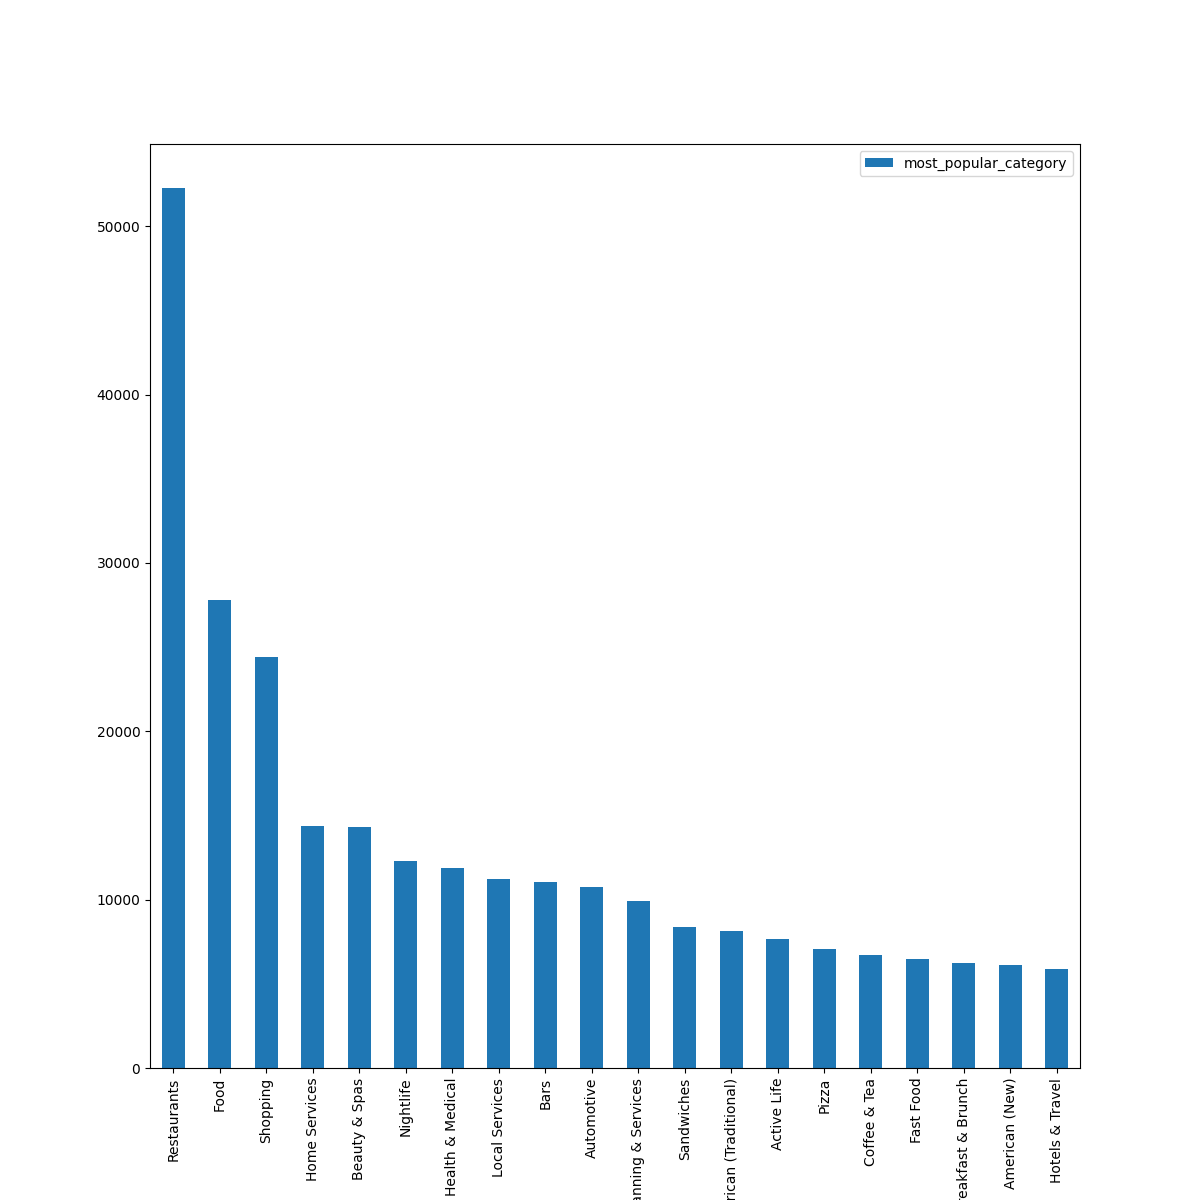

In [18]:
sqldf.toPandas().plot(kind ='bar', x ='category', figsize =(12,12))
%matplot plt


## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available. `s3://cis9760-yelpdataset/yelp-light/*review.json`

In [19]:
review = spark.read.json('s3://project02-data/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [21]:
user_review = review.select("business_id", "stars")
user_review.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|  3.0|
|7ATYjTIgM3jUlt4UM...|  5.0|
|YjUWPpI6HXG530lwP...|  3.0|
|kxX2SOes4o-D3ZQBk...|  5.0|
|e4Vwtrqf-wpJfwesg...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [22]:
#to check if our data has users that did not write a review.
print(f"Submitted written review: {review.filter(review.text.isNotNull()).count():,}")
print(f"No written review submitted: {review.filter(review.text.isNull()).count():,}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Submitted written review: 6,990,280
No written review submitted: 0

In [23]:
avg_star = user_review.groupBy("business_id").avg("stars")
avg_star.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|HSzSGdcNaU7heQe0N...|3.3333333333333335|
|skW4boArIApRw9DXK...|2.3947368421052633|
|zJErbOQMKX-MwHs_u...|2.9279279279279278|
|I0053JmJ5DEFUWSJ8...|2.3956043956043955|
|wS-SWAa_yaJAw6fJm...| 3.357142857142857|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [24]:
bus = business.select("business_id", "name", "city", "state", "stars")
rev = avg_star.select("business_id", "avg(stars)")
combined = bus.join(rev, bus.business_id == rev.business_id)
comb = combined.drop("business_id")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [25]:
comb=comb.select("name", "city", "state", "avg(stars)","stars")
comb.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+
|                name|        city|state|        avg(stars)|stars|
+--------------------+------------+-----+------------------+-----+
|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|  3.0|
|Gaetano's of West...| West Berlin|   NJ|2.8823529411764706|  3.0|
|Gillane's Bar & G...|     Ardmore|   PA|3.3333333333333335|  3.0|
|Champps Penn's La...|Philadelphia|   PA|2.3947368421052633|  2.5|
|Golden Corral Buf...|      Tucson|   AZ|2.3956043956043955|  2.5|
+--------------------+------------+-----+------------------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [26]:
comb = comb.withColumn('skew', ( comb['avg(stars)'] - comb['stars'] ) / comb['stars'] )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
comb.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+------------------+-----+--------------------+
|                name|        city|state|        avg(stars)|stars|                skew|
+--------------------+------------+-----+------------------+-----+--------------------+
|Gillane's Bar & G...|     Ardmore|   PA|3.3333333333333335|  3.0| 0.11111111111111116|
|Champps Penn's La...|Philadelphia|   PA|2.3947368421052633|  2.5|-0.04210526315789469|
|Philadelphia Marr...|Philadelphia|   PA|2.9279279279279278|  3.0|-0.02402402402402...|
|Golden Corral Buf...|      Tucson|   AZ|2.3956043956043955|  2.5|-0.04175824175824179|
|  Swiss Watch Center|       Tampa|   FL| 3.357142857142857|  3.5|-0.04081632653061223|
+--------------------+------------+-----+------------------+-----+--------------------+
only showing top 5 rows

In [28]:
pdf = comb.select("skew")
pdf = pdf.toPandas()
pdf


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            skew
0      -0.024024
1      -0.039216
2       0.111111
3      -0.042105
4      -0.041758
...          ...
150341  0.000000
150342  0.000000
150343 -0.166667
150344  0.000000
150345  0.010101

[150346 rows x 1 columns]

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

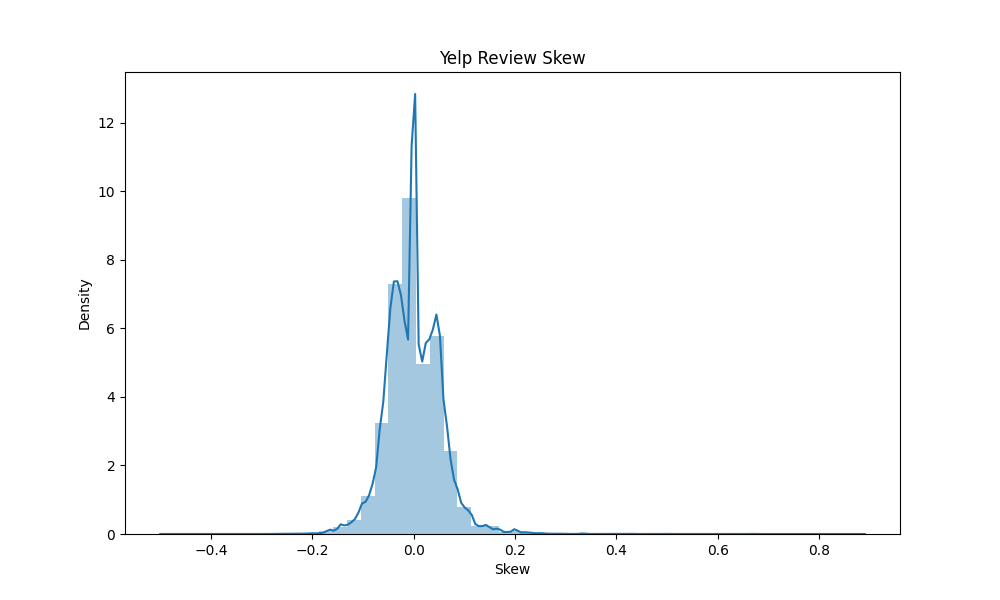

In [29]:
plt.figure(figsize =(10,6))
from scipy.stats import norm
sb.distplot(pdf, axlabel='Skew', kde=True).set(title='Yelp Review Skew')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

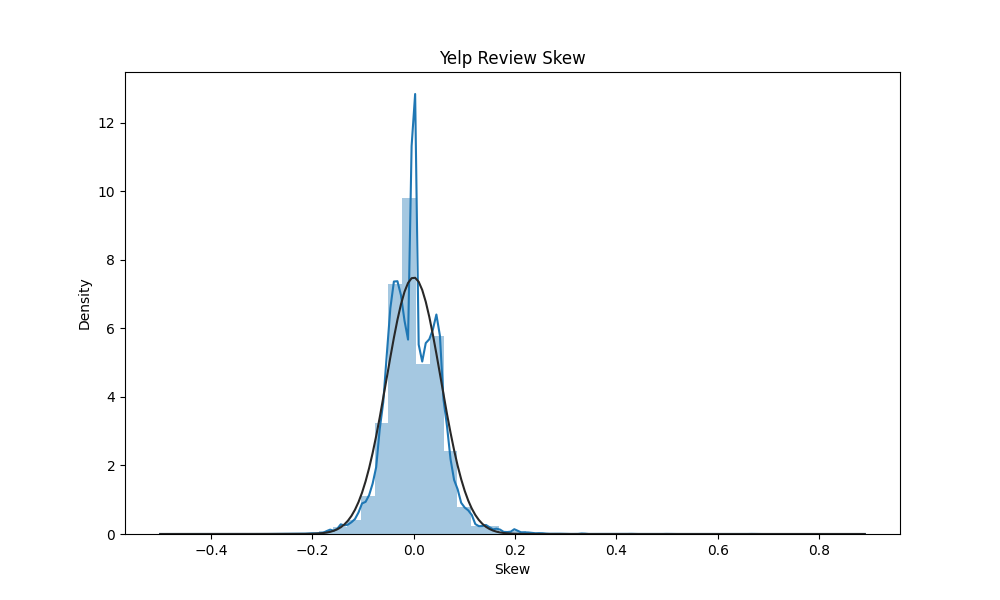

In [30]:
#To check against normal distribution
plt.figure(figsize=(10,6))
from scipy.stats import norm
sb.distplot(pdf, axlabel='Skew', fit = norm, kde=True).set(title='Yelp Review Skew')
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

### ANSWER: 


Yes, Yelp reviews skew negative.The distribution of written reviews/skew curve (in blue) is non-symmetric comparing to the bell-shaped curve (in black) for symmetric distribution. The plot of the Skew distribution does not have a well-defined center of data distribution that implies to a satisfaction rate differences between reviewers who wrote an actual review and reviewers who just provided a star rating. It is "skewed left" which means that reviewers who wrote an actual review are generally more pessimistic as compared to the overall business rating. 

### IMPLICATIONS:

Sometimes it is a more convenient way of resolving or escalating issues directly to a business owner/manager by proving feedbacks on Yelp. Hypothetically, customers who wrote an actual review probably were dissatisfied with the business and spent some time on writing a review on Yelp as a way to inform the business management. On contrary, customers that were satisfied with the business and had no issues with service/product usually have no incentives to write a good review unless it is paid or rewarded. Therefore, a slight negative difference in ratings between written reviews and "a star rating without a written review" could exist. It might not necessarily related directly to reviewers who wrote an actual review as more pessimistic. They had an incentive to write their review in order to communicate the issue to the business directly on Yelp. In this case, when the overall rating of the business is better, the business rating could be a better metric for business evaluation and customer satisfaction. My plot interpretation above requires additional data analysis on reviewers' rating and written reviews to confirm my skew graph interpretation.

# Should the Elite be Trusted?

How accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating? `s3://cis9760-yelpdataset/yelp-light/*user.json`

Feel free to use any and all methodologies at your disposal. 
You must render one visualization in your analysis and interpret your findings.

In [31]:
user = spark.read.json('s3://project02-data/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [33]:
# to filter elite users from the list of all users
user1 = user.select("user_id","average_stars", "elite", "review_count", "useful")
user1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+------------+------+
|             user_id|average_stars|               elite|review_count|useful|
+--------------------+-------------+--------------------+------------+------+
|qVc8ODYU5SZjKXVBg...|         3.91|                2007|         585|  7217|
|j14WgRoU_-2ZE1aw1...|         3.74|2009,2010,2011,20...|        4333| 43091|
|2WnXYQFK0hXEoTxPt...|         3.32|2009,2010,2011,20...|         665|  2086|
|SZDeASXq7o05mMNLs...|         4.27|      2009,2010,2011|         224|   512|
|hA5lMy-EnncsH4JoR...|         3.54|                    |          79|    29|
|q_QQ5kBBwlCcbL1s4...|         3.85|2006,2007,2008,20...|        1221| 14953|
|cxuxXkcihfCbqt5By...|         2.75|                    |          12|     6|
|E9kcWJdJUHuTKfQur...|         3.73|                    |         358|   399|
|lO1iq-f75hnPNZkTy...|         4.04|                    |          40|   109|
|AUi8MPWJ0mLkMfwbu...|          3.4|                    |       

In [34]:
print(f"Number of rows in the user1 table: {user1.count():,}")
print(f"Number of columns in the user1 table: {len(user1.dtypes)}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of rows in the user1 table: 1,987,897
Number of columns in the user1 table: 5

In [35]:
# searching for blanks
user2 = user1.filter(user1.elite == "").sort(user1.review_count.desc())
user2.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+-----+------------+------+
|             user_id|average_stars|elite|review_count|useful|
+--------------------+-------------+-----+------------+------+
|Xwnf20FKuikiHcSpc...|         3.32|     |        6766|  8348|
|ILk4dRvuBf6Axfq3q...|         3.59|     |        3381| 10950|
|sjV4NqZx5d0NqY1y7...|         4.99|     |        3332|   718|
|3xBFFH866WoySDG7u...|         3.96|     |        3204| 35967|
|gAvuqk1q2uAo2BJzZ...|         4.64|     |        3193|  9818|
|s3kRi7b8t2sdtYcsM...|         3.39|     |        2908|  1792|
|UE-rXhA8njNnADFkD...|         3.55|     |        2651|  1837|
|ES12kMOR5fdoEnSXv...|         3.38|     |        2500|  1611|
|BOU25_BWQnLdFJBKU...|         2.58|     |        2372|  3660|
|Zl1fJNTzNULZiqBRS...|          3.3|     |        2349| 10249|
|ELcQDlf69kb-ihJfx...|         3.08|     |        2337|  5208|
|kZJWAY828P8QZTqVY...|         3.69|     |        2302| 17030|
|-shHTy1CEmSMPVSeh...|         3.35|     |        2112|

In [36]:
elite = user1.filter(user1.elite != "").sort(user1.review_count.desc())
elite.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+--------------------+------------+------+
|             user_id|average_stars|               elite|review_count|useful|
+--------------------+-------------+--------------------+------------+------+
|Hi10sGSZNxQH3NLyW...|         3.77|2014,2015,2016,20...|       17473|206296|
|8k3aO-mPeyhbR5HUu...|         3.35|2008,2009,2010,20...|       16978|152979|
|hWDybu_KvYLSdEFzG...|         3.67|2010,2011,2012,20...|       16567|173089|
|RtGqdDBvvBCjcu5dU...|         3.87|2012,2013,2014,20...|       12868| 11109|
|P5bUL3Engv-2z6kKo...|         3.81|2006,2007,2008,20...|        9941| 27549|
|nmdkHL2JKFx55T3nq...|         3.75|2012,2013,2014,20...|        8363| 57242|
|bQCHF5rn5lMI9c5kE...|         3.87|2012,2013,2014,20...|        8354| 42959|
|8RcEwGrFIgkt9WQ35...|         3.49|           2010,2011|        7738|  8110|
|CxDOIDnH8gp9KXzpB...|         3.34|2009,2010,2011,20...|        6679| 23254|
|IucvvxdQXXhjQ4z6O...|         3.53|2009,2010,2011,20...|       

In [37]:
user2.count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1896699

In [38]:
elite.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

91198

In [39]:
elite = elite.withColumnRenamed("user_id","userid")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
#joined on the review.json

rev1 = review.select("user_id", "business_id", "stars")
merged = elite.join(rev1, elite.userid == rev1.user_id)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
merged.printSchema()
merged.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- userid: string (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- elite: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- stars: double (nullable = true)

1725658

In [42]:
pl = merged.toPandas()
pl

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                         userid  average_stars  ...             business_id  stars
0        IeSz60ozr1yAVIH8CX9w9w           4.19  ...  TV81bpCQ6p6o4Hau5hk-zw    4.0
1        xW2A0MciHB0pLB4RHTi0nw           3.86  ...  W4ZEKkva9HpAdZG88juwyQ    5.0
2        SSafXe2aUO0cXgQhEdtzrA           4.05  ...  E-4t5Hoon6aVFTWDPz26fQ    5.0
3        yiYUEExKfZEv_T8CFTBGRA           3.72  ...  _pbx96FZ3eHJw-V_R4h-Vg    3.0
4        A3EiqW7_k00gvaiQi6qWTQ           4.37  ...  8uF-bhJFgT4Tn6DTb27viA    5.0
...                         ...            ...  ...                     ...    ...
1725653  uTV9DQUd8-8y9LvbXowzzQ           4.15  ...  K59I711q4mFXw7ZBxdwBTg    1.0
1725654  im1piwjKBavmW1-tbqhqEw           3.69  ...  -6JdVK-DHB4_43PEksbg1A    4.0
1725655  im1piwjKBavmW1-tbqhqEw           3.69  ...  4hwuN5Z504_EbRS1XjoXsA    4.0
1725656  Vqgtngey014F0bqj71q0aw           3.91  ...  R1WdznjbaFJ25eaAjvjExA    4.0
1725657  im1piwjKBavmW1-tbqhqEw           3.69  ...  z-U6eeQ4QszzXxS1fNuajQ    4.0

[17

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

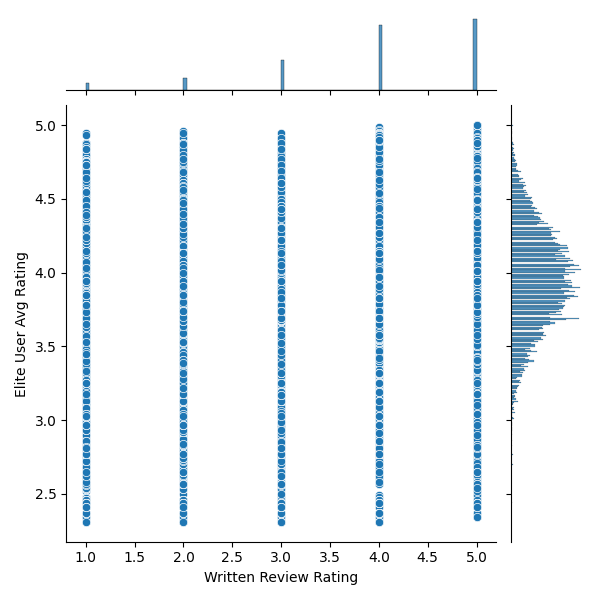

In [43]:
fig, ax=plt.subplots(figsize=(10,6))
sb.jointplot(pl["stars"], pl["average_stars"]).set_axis_labels(xlabel="Written Review Rating", ylabel="Elite User Avg Rating", size=10)     
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

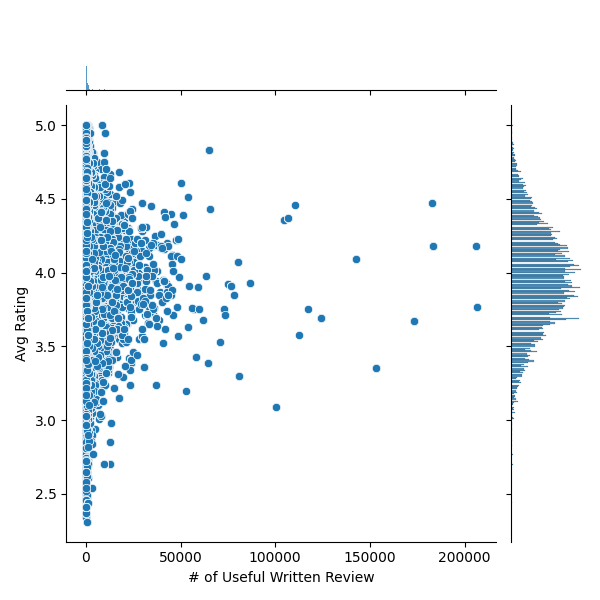

In [44]:
fig, ax=plt.subplots(figsize=(10,6))
sb.jointplot(pl["useful"], pl["average_stars"]).set_axis_labels(xlabel="# of Useful Written Review", ylabel="Avg Rating", size=10)
%matplot plt

In [45]:
merged = merged.drop("elite", "user_id")
merged.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------------+------+--------------------+-----+
|              userid|average_stars|review_count|useful|         business_id|stars|
+--------------------+-------------+------------+------+--------------------+-----+
|IeSz60ozr1yAVIH8C...|         4.19|         466|   616|TV81bpCQ6p6o4Hau5...|  4.0|
|xW2A0MciHB0pLB4RH...|         3.86|         600|  1218|W4ZEKkva9HpAdZG88...|  5.0|
|SSafXe2aUO0cXgQhE...|         4.05|         228|   304|E-4t5Hoon6aVFTWDP...|  5.0|
|yiYUEExKfZEv_T8CF...|         3.72|          96|   134|_pbx96FZ3eHJw-V_R...|  3.0|
|A3EiqW7_k00gvaiQi...|         4.37|          45|    27|8uF-bhJFgT4Tn6DTb...|  5.0|
|Zsucq1c-sjuGxs5jZ...|         3.73|         253|   817|zaC6coZ5Gp8mLjeg7...|  4.0|
|aX3vDE1UmbdrWeOsg...|         4.17|         197|   129|EqEcDeXqIq1YwnzHg...|  5.0|
|aHiQYaTXrmQTeG610...|         4.13|         458|   940|3w7NRntdQ9h0KwDsk...|  4.0|
|g34Qcj06LmCDhKzks...|         3.99|         293|  1460|yE1raqkLX7OZsjmX3...

In [46]:
avg_star_rev = merged.groupBy("userid").avg("stars")
avg_star_rev = avg_star_rev.withColumnRenamed("userid", "user_id")
avg_star_rev.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|             user_id|        avg(stars)|
+--------------------+------------------+
|IeSz60ozr1yAVIH8C...| 4.289592760180995|
|xW2A0MciHB0pLB4RH...|3.4444444444444446|
|SSafXe2aUO0cXgQhE...| 3.884297520661157|
|yiYUEExKfZEv_T8CF...| 3.742857142857143|
|A3EiqW7_k00gvaiQi...|               5.0|
+--------------------+------------------+
only showing top 5 rows

In [47]:
merged1 = merged.select("userid", "business_id", "stars", "average_stars")
merged2 = merged.join(avg_star_rev, merged.userid == avg_star_rev.user_id)
merged2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+------------+------+--------------------+-----+--------------------+------------------+
|              userid|average_stars|review_count|useful|         business_id|stars|             user_id|        avg(stars)|
+--------------------+-------------+------------+------+--------------------+-----+--------------------+------------------+
|IeSz60ozr1yAVIH8C...|         4.19|         466|   616|TV81bpCQ6p6o4Hau5...|  4.0|IeSz60ozr1yAVIH8C...| 4.289592760180995|
|xW2A0MciHB0pLB4RH...|         3.86|         600|  1218|W4ZEKkva9HpAdZG88...|  5.0|xW2A0MciHB0pLB4RH...|3.4444444444444446|
|SSafXe2aUO0cXgQhE...|         4.05|         228|   304|E-4t5Hoon6aVFTWDP...|  5.0|SSafXe2aUO0cXgQhE...| 3.884297520661157|
|yiYUEExKfZEv_T8CF...|         3.72|          96|   134|_pbx96FZ3eHJw-V_R...|  3.0|yiYUEExKfZEv_T8CF...| 3.742857142857143|
|A3EiqW7_k00gvaiQi...|         4.37|          45|    27|8uF-bhJFgT4Tn6DTb...|  5.0|A3EiqW7_k00gvaiQi...|               5.0|
|Zsucq1c

In [48]:
#elite users that have written reviews
mer = merged2.select("userid", "business_id", "avg(stars)")
mer.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------------+
|              userid|         business_id|        avg(stars)|
+--------------------+--------------------+------------------+
|IeSz60ozr1yAVIH8C...|TV81bpCQ6p6o4Hau5...| 4.289592760180995|
|xW2A0MciHB0pLB4RH...|W4ZEKkva9HpAdZG88...|3.4444444444444446|
|SSafXe2aUO0cXgQhE...|E-4t5Hoon6aVFTWDP...| 3.884297520661157|
|yiYUEExKfZEv_T8CF...|_pbx96FZ3eHJw-V_R...| 3.742857142857143|
|A3EiqW7_k00gvaiQi...|8uF-bhJFgT4Tn6DTb...|               5.0|
+--------------------+--------------------+------------------+
only showing top 5 rows

In [49]:
bus1 = business.select("business_id", "stars")
mer1 = mer.join(bus1, mer.business_id == bus1.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
#mer1.drop("business_id", "userid")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
mer1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------------+--------------------+-----+
|              userid|         business_id|        avg(stars)|         business_id|stars|
+--------------------+--------------------+------------------+--------------------+-----+
|IeSz60ozr1yAVIH8C...|TV81bpCQ6p6o4Hau5...| 4.289592760180995|TV81bpCQ6p6o4Hau5...|  4.5|
|xW2A0MciHB0pLB4RH...|W4ZEKkva9HpAdZG88...|3.4444444444444446|W4ZEKkva9HpAdZG88...|  4.0|
|SSafXe2aUO0cXgQhE...|E-4t5Hoon6aVFTWDP...| 3.884297520661157|E-4t5Hoon6aVFTWDP...|  4.0|
|yiYUEExKfZEv_T8CF...|_pbx96FZ3eHJw-V_R...| 3.742857142857143|_pbx96FZ3eHJw-V_R...|  2.5|
|A3EiqW7_k00gvaiQi...|8uF-bhJFgT4Tn6DTb...|               5.0|8uF-bhJFgT4Tn6DTb...|  4.5|
|Zsucq1c-sjuGxs5jZ...|zaC6coZ5Gp8mLjeg7...| 3.712328767123288|zaC6coZ5Gp8mLjeg7...|  4.5|
|aX3vDE1UmbdrWeOsg...|EqEcDeXqIq1YwnzHg...| 4.110429447852761|EqEcDeXqIq1YwnzHg...|  4.5|
|aHiQYaTXrmQTeG610...|3w7NRntdQ9h0KwDsk...| 4.109181141439206|3w7NRntdQ9h0KwDsk...|  2.0|
|g34Qcj06L

In [52]:
mer2 = mer1.withColumn('skew', ( mer1['avg(stars)'] - mer1['stars'] ) / mer1['stars'] )
mer2.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------------+--------------------+-----+--------------------+
|              userid|         business_id|        avg(stars)|         business_id|stars|                skew|
+--------------------+--------------------+------------------+--------------------+-----+--------------------+
|IeSz60ozr1yAVIH8C...|TV81bpCQ6p6o4Hau5...| 4.289592760180995|TV81bpCQ6p6o4Hau5...|  4.5|-0.04675716440422...|
|xW2A0MciHB0pLB4RH...|W4ZEKkva9HpAdZG88...|3.4444444444444446|W4ZEKkva9HpAdZG88...|  4.0|-0.13888888888888884|
+--------------------+--------------------+------------------+--------------------+-----+--------------------+
only showing top 2 rows

In [53]:
pd = mer2.select("skew")
pd = pd.toPandas()
pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

             skew
0       -0.046757
1       -0.138889
2       -0.028926
3        0.497143
4        0.111111
...           ...
1725653  0.346801
1725654 -0.087025
1725655 -0.087025
1725656 -0.102941
1725657  0.217300

[1725658 rows x 1 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

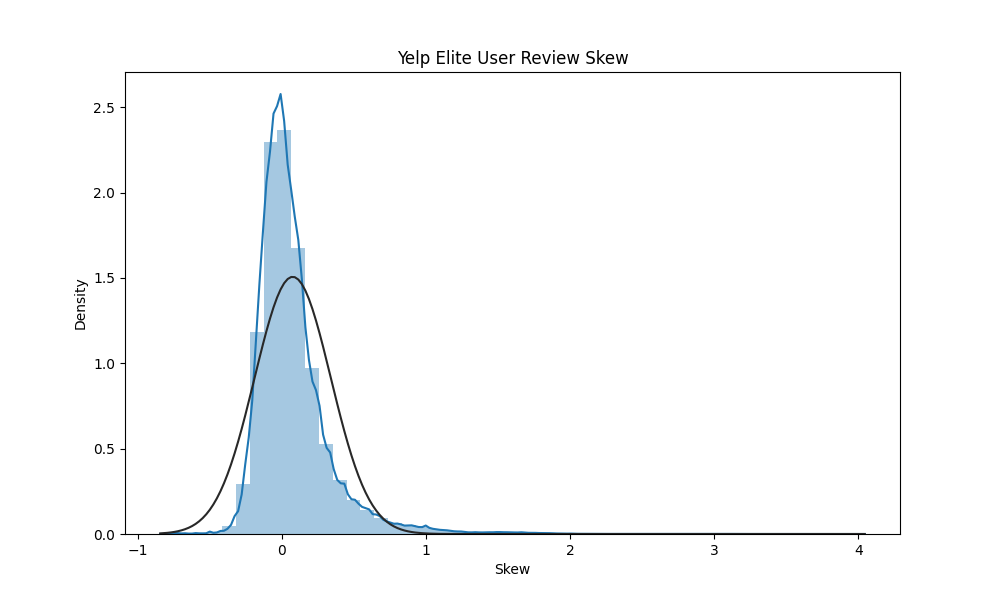

In [54]:
#To check against normal distribution
plt.figure(figsize=(10,6))
from scipy.stats import norm
sb.distplot(pd, axlabel='Skew', fit = norm, kde=True).set(title='Yelp Elite User Review Skew')
%matplot plt

### FINDINGS:

 No, the Elite should not be trusted based on my explanation on finding below. The first scatterplot with linear regression and marginal distributions graph shows no strong linear relationship between the Elite User's Average Rating and Written Review Rating. It shows that Elite Users write reviews with bad and good rating. It means the elite users’ reviews has a normal average rating distribution. The marginal distribution displays a 5- and 4-rating written reviews represent major part of elite users writing reviews. Therefore, my previous assumption that the written reviews ratings in general are in a low rating range is incorrect for elite users data sample. The second scatter plot with linear regression and marginal distributions graph shows no strong linear relationship between the Elite User's Average Rating and their total reviews' usefulness. Similarly, the second scatter plot does not display a linear relationship between Elite User's Average Rating and their reviews' usefulness for all their written reviews. In addition, it shows that Elite users' average rate range is from 1 to 5 have been useful with their written comments to some extent. However, there are more written reviews that have been useful from the Elite users that have an average rating between 3.5 and 4.5. The majority of reviews have been written by Elite users that have a low record of total usefulness as indicates the marginal distribution figure. Therefore, Elite users have more positive written reviews. The Elite users' skew graph is more "skewed right" which means that Elite reviewers who wrote an actual review are generally more optimistic as compared to the overall business rating. This contradiction in comparative analysis on written reviews between Elite users and all users requires additional analysis to understand the trend and outliers.

### IMPLICATIONS:

Comparative analysis is necessary in order to confirm if Elite users are trustworthy, we need to compare rating distribution, usefulness and its' relationship from other users to Elite users. It will help to rule out Elite users' bias on written reviews.

# Extra Credit (3 points)
## What users (elite or non-elite) provide useful reviews and are trustworth?

Try and analyze some interesting dimension to this data. 
**Requirements:**

You must use the **Users** dataset and join on either the "**business** or **reviews** dataset.

You must render **one visual**


Since the elite users have provided mostly 4 and 5-rating written reviews as above analysis, it makes sense to compare relationship of usefulness of written comment, total number of comments per user with a review rating to support the creditability of the elite and non-elite reviewers.

In [55]:
rev_use = review.select("user_id","review_id", "stars", "useful")
rev_use = rev_use.withColumnRenamed("useful","review_useful")
rev_use = rev_use.withColumnRenamed("star","review_star")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
users = user2.withColumnRenamed("user_id","userid")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
#joined on the review for elite users
elite_user = elite.join(rev_use, elite.userid == rev_use.user_id)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
#joined on the review for other users but not elite
other_user = users.join(rev_use, users.userid == rev_use.user_id)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
#Threshold for users with >1000 written reviews
elite_user_treshold = elite_user.filter(elite_user.review_count > '1000').sort(elite_user.review_count.desc())
other_user_treshold = other_user.filter(other_user.review_count > '1000').sort(other_user.review_count.desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
#calculate the ratio of useful reviews count and total # of written reviews for elite users
elite_ratio = elite_user_treshold.withColumn('ratio of useful/ttl reviews', ( elite_user_treshold['useful'] / elite_user_treshold['review_count'] ))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [61]:
#calculate the ratio of useful review count and total # of written reviews for non-elite users
users_ratio = other_user_treshold.withColumn('ratio of useful/ttl reviews', ( other_user_treshold['useful'] / other_user_treshold['review_count'] ))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
elite_tb = elite_ratio.select("ratio of useful/ttl reviews", "stars")
users_tb = users_ratio.select("ratio of useful/ttl reviews", "stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
elite_tb1 = elite_tb.toPandas()
users_tb1 = users_tb.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

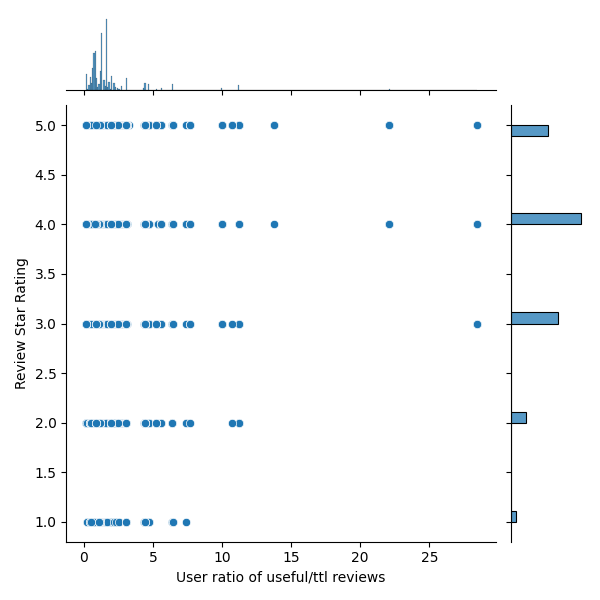

In [66]:
# comparative visualization Elite users vs Non-elite users
fig, ax=plt.subplots(figsize=(10,6))
sb.jointplot(users_tb1["ratio of useful/ttl reviews"], users_tb1["stars"]).set_axis_labels(xlabel="User ratio of useful/ttl reviews", ylabel="Review Star Rating", size=10)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

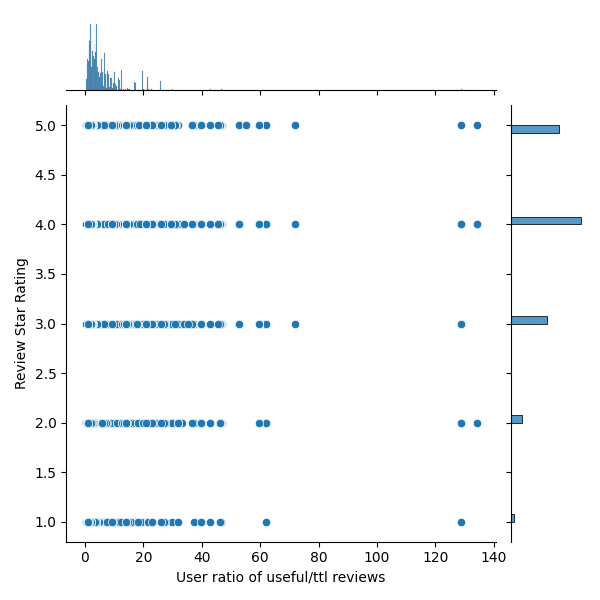

In [67]:
fig, ax=plt.subplots(figsize=(10,6))
sb.jointplot(elite_tb1["ratio of useful/ttl reviews"], elite_tb1["stars"]).set_axis_labels(xlabel="User ratio of useful/ttl reviews", ylabel="Review Star Rating", size=10)
%matplot plt

### FINDINGS/CONCLUSION:

On x-axis is a ratio of useful reviews total count and total # of written reviews for that specific user (the higher the ratio, more useful reviews the user provided in total)
On y-axis is a star rating for each review.

The first figure for non-elite users demonstrates that their reviews mostly are a 4-star rating. These users did not provide many useful reviews historically. The threshold for the users with a ratio on useful reviews historically is from 8 to 11. This demonstrates that non-elite users with a low ration of useful reviews historically tend to write a 4-star review more often. Mostly non-elite users that have historically the lowest ratio on review usefulness have written reviews with a 1-star rating. Only a few Non-elite reviewers that historically have the highest ratio on useful reviews did not write any a 1-star rating reviews. Therefore, non-elite reviewers leave a good rating review more often and less frequently a low rating review. All these non-elite users’ reviews do not demonstrate a high level of usefulness on average historically.

The second figure for Elite users demonstrates that their reviews mostly are a 4-star rating same as with non-elite reviewers. Elite users have provided many useful reviews historically comparing to non-elite users. The threshold for the Elite users with a ratio on useful reviews historically is from 50 to 60. This demonstrates that Elite reviewers tend to leave a good review and bad reviews that are more useful to others users. 

In conclusion, this analysis provides some information that highlights that the Elite users have more creditability and can be trusted on their reviews.
